In [46]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params
from multi_group_simulation import MultiGroupSimulation

In [48]:
grp_params, grp_names, interactions_mtx = \
    load_multigroup_params("../src/simulations_v2/params/multigroup/tompkins_vs_cornell.yaml")

In [49]:
multigrp_sim = MultiGroupSimulation(grp_params, interactions_mtx, grp_names)

In [50]:
num_trajectories = 100
sim_dfs_group_0 = []
sim_dfs_group_1 = []
for _ in range(num_trajectories):
    multigrp_sim.reset_initial_state()
    for _ in range(112):
        multigrp_sim.step()
    sim_dfs_group_0.append(multigrp_sim.sims[0].sim_df)
    sim_dfs_group_1.append(multigrp_sim.sims[1].sim_df)

Text(0, 0.5, 'Cornell Community')

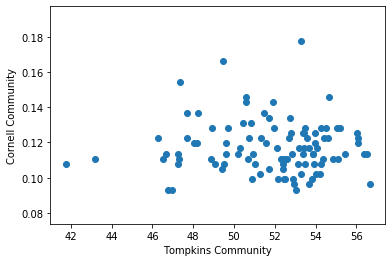

In [51]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

pct_0s = []
pct_1s = []
for df_grp_0, df_grp_1 in zip(sim_dfs_group_0, sim_dfs_group_1):
    pct_0, pct_1 = infection_pct(df_grp_0), infection_pct(df_grp_1)
    pct_0s.append(pct_0)
    pct_1s.append(pct_1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(pct_0s, pct_1s)
plt.xlabel("Tompkins Community")
plt.ylabel("Cornell Community")
    

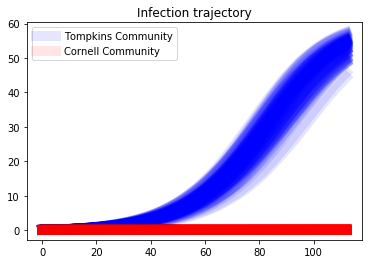

In [52]:
def add_df_plot(df, label, color):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=0.1, linewidth=10, color=color)
    
#sim_dfs_group_0 = []
#sim_dfs_group_1 = []

add_df_plot(sim_dfs_group_0[0], label="Tompkins Community", color='blue')
for df0 in sim_dfs_group_0[1:]:
    add_df_plot(df0, label='', color='blue')

add_df_plot(sim_dfs_group_1[0], label="Cornell Community", color='red')
for df1 in sim_dfs_group_1[1:]:
    add_df_plot(df1, label='', color='red')
    

plt.title("Infection trajectory")
plt.legend(loc='best')